# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

# Unionized labour Market Model
In the following assignment, we have chosen to implement and solve the trade union model as presented in Introducing Advanced Macroeconomics, Growth and Business Cycles by Sørensen and Whitta-Jacobsen (2010).  

We consider a unionized labour market with N homogeneous agents, who supply labour inelastically. The union wants to maximize the following optimization:
$$
\begin{aligned}
\Omega & =\max_w(w-b)L^d(w)^{\eta}, & \eta>0
\end{aligned}
$$
Where $w$ is the wage rate, $b$ is the unemployment, which is exogeneous, and $\eta$ is a parameter affecting how much the union cares about employment versus high wages for its members.

In the product market, there is $n$ heterogenous products which has the following demand:
$$
\begin{aligned}
D(P_i)=\frac{P_i}{P}^{-\sigma}\frac{Y}{n}, & \sigma>1
\end{aligned}
$$
Where $\frac{P_i}{P}=p_i$ is the relative prices of the products and $\sigma$ is the price elasticity of demand. 

Firms producing the products in the economy are operating under monopolistic competition. The production function of each firm is given by:
$$
\begin{aligned}
Y_i=L_i
\end{aligned}
$$
Where $L_i$ is employment. Thus labour is the only input in production. To begin with, we assume that the labour unions have all the market power such that the firms take the wages chosen by he union as given. We will change this later when extending the model. Using the demand for products, the production function and the fact that the firms take wages as given, their profit function is given as:
$$
\begin{aligned}
\pi_i = p_i^{-\sigma}\frac{Y}{n}(p_i-w)
\end{aligned}
$$

**Thus the partial equilibrium is characterized by:**
1. Labour unions maximizing utility for members
2. Firms maximize profits
3. Labour market clears such that: $N=u(w)+L(w)$

In [84]:
p = sm.symbols('p')
w = sm.symbols('w')
sigma = sm.symbols('sigma')
La = sm.symbols('La')
b = sm.symbols('b')
eta = sm.symbols('eta')

profit = p**-sigma*(p-w)

d_profit_dp = sm.diff(profit, p)
p_max_profit = sm.solve(d_profit_dp, p)[0]

p_max_profit


sigma*w/(sigma - 1)

In [85]:
Yp = p_max_profit**-sigma
Yp = L

L

(sigma*w/(sigma - 1))**(-sigma)

In [86]:
union = (w-b)*L**eta

d_union_dp = sm.diff(union, w)
w_max_union = sm.solve(d_union_dp, w)[0]

w_max_union

b*eta*sigma/(eta*sigma - 1)

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

In [72]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sm

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload

# Import our own code
from modelproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\bjark\AppData\Local\Temp\ipykernel_27936\1208385198.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


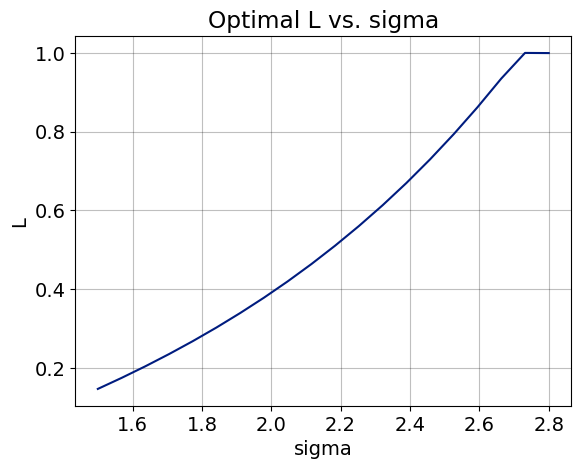

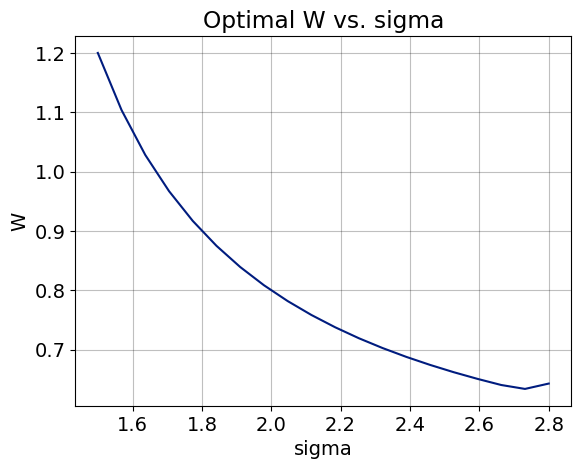

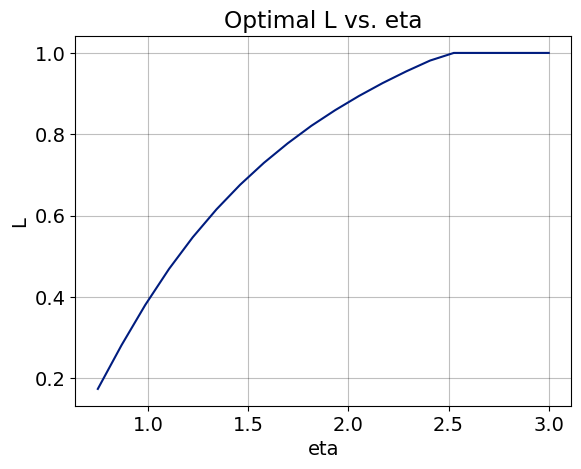

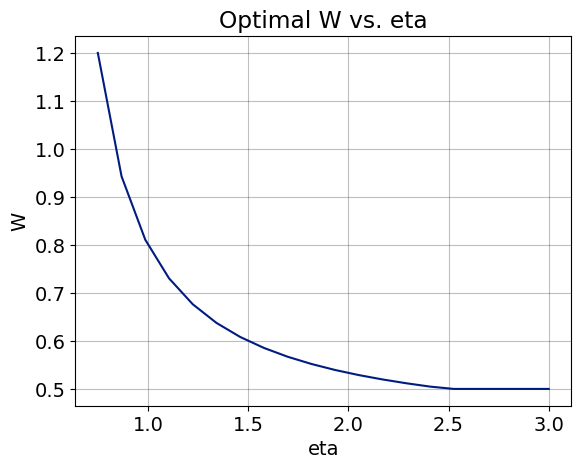

In [73]:
#Set base parameters
model.par.sigma = 2
model.par.eta = 1
model.par.b = 0.4

list_sigmas = np.linspace(1.5, 2.8, 20)
results_df = pd.DataFrame(columns=['W', 'L', 'sigma'])

# We solve the model for each eta and sigma in the above vectors using a loop
for sigma in list_sigmas:
    model.par.sigma = sigma
    opt = model.solve() # Calling the model from the class
    results_df.loc[len(results_df)] = [opt.W, opt.L, sigma]


#Plot sigma VS L:
fig, ax = plt.subplots()
ax.plot(results_df['sigma'], results_df['L'])
ax.set_xlabel('sigma')
ax.set_ylabel('L')
ax.set_title('Optimal L vs. sigma')
plt.show()

#Plot sigma VS W:
fig, ax = plt.subplots()
ax.plot(results_df['sigma'], results_df['W'])
ax.set_xlabel('sigma')
ax.set_ylabel('W')
ax.set_title('Optimal W vs. sigma')
plt.show()

#As function of etas:

list_etas = np.linspace(0.75, 3, 20)
results_df_eta = pd.DataFrame(columns=['W', 'L', 'eta'])

#Set parameter to baseline:
model.par.sigma = 2

# We solve the model for each eta and sigma in the above vectors using a loop
for eta in list_etas:
    model.par.eta = eta
    opt = model.solve() # Calling the model from the class
    results_df_eta.loc[len(results_df_eta)] = [opt.W, opt.L, eta]


#Plot eta VS L:
fig, ax = plt.subplots()
ax.plot(results_df_eta['eta'], results_df_eta['L'])
ax.set_xlabel('eta')
ax.set_ylabel('L')
ax.set_title('Optimal L vs. eta')
plt.show()

#Plot eta VS W:
fig, ax = plt.subplots()
ax.plot(results_df_eta['eta'], results_df_eta['W'])
ax.set_xlabel('eta')
ax.set_ylabel('W')
ax.set_title('Optimal W vs. eta')
plt.show()



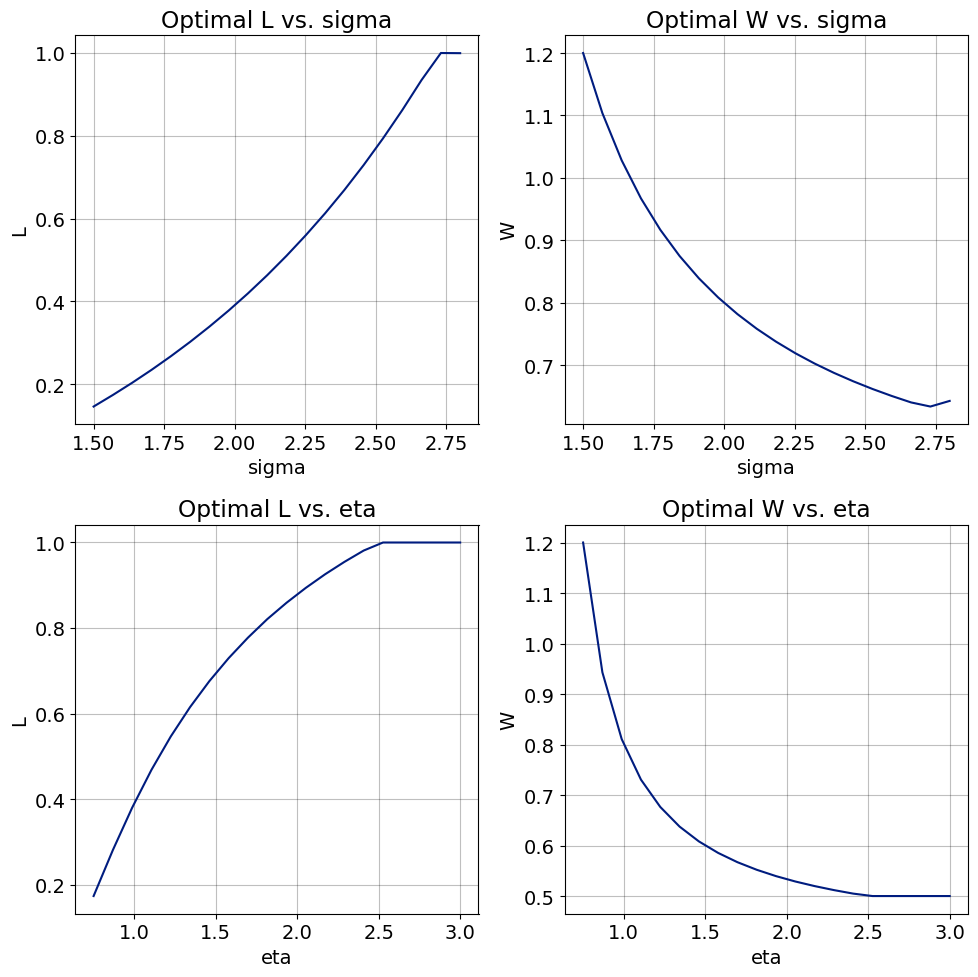

In [74]:
# Set base parameters
model.par.sigma = 2
model.par.eta = 1
model.par.b = 0.4

# Set up grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot sigma vs. L
list_sigmas = np.linspace(1.5, 2.8, 20)
results_df = pd.DataFrame(columns=['W', 'L', 'sigma'])
for sigma in list_sigmas:
    model.par.sigma = sigma
    opt = model.solve()
    results_df.loc[len(results_df)] = [opt.W, opt.L, sigma]
axs[0, 0].plot(results_df['sigma'], results_df['L'])
axs[0, 0].set_xlabel('sigma')
axs[0, 0].set_ylabel('L')
axs[0, 0].set_title('Optimal L vs. sigma')

# Plot sigma vs. W
axs[0, 1].plot(results_df['sigma'], results_df['W'])
axs[0, 1].set_xlabel('sigma')
axs[0, 1].set_ylabel('W')
axs[0, 1].set_title('Optimal W vs. sigma')

# Plot eta vs. L
list_etas = np.linspace(0.75, 3, 20)
results_df_eta = pd.DataFrame(columns=['W', 'L', 'eta'])
model.par.sigma = 2
for eta in list_etas:
    model.par.eta = eta
    opt = model.solve()
    results_df_eta.loc[len(results_df_eta)] = [opt.W, opt.L, eta]
axs[1, 0].plot(results_df_eta['eta'], results_df_eta['L'])
axs[1, 0].set_xlabel('eta')
axs[1, 0].set_ylabel('L')
axs[1, 0].set_title('Optimal L vs. eta')

# Plot eta vs. W
axs[1, 1].plot(results_df_eta['eta'], results_df_eta['W'])
axs[1, 1].set_xlabel('eta')
axs[1, 1].set_ylabel('W')
axs[1, 1].set_title('Optimal W vs. eta')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


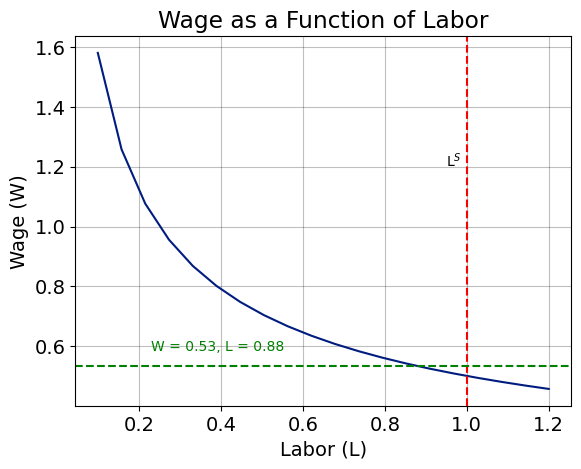

In [51]:
# Set baseline parameters
model.par.sigma= 2
model.par.eta = 2
model.par.b = 0.4

# Create a list of labor values
list_Labor = np.linspace(0.1, 1.2, 20)

# Calculate the wage for each labor value
list_Wage = (list_Labor**(1/-model.par.sigma))*(model.par.sigma-1)/model.par.sigma 


# Plot the results
plt.plot(list_Labor, list_Wage)
plt.axvline(x=1, color='r', linestyle='--') # add a vertical line at L=1

# Obtain the wage and labor values using model.solve()
opt = model.solve()
wage_opt = opt.W
labor_opt = opt.L

# Add a horizontal line at the wage and labor values obtained from model.solve()
plt.axhline(y=wage_opt, color='g', linestyle='--')
plt.text(labor_opt-0.65, wage_opt+0.05, 'W = {:.2f}, L = {:.2f}'.format(wage_opt, labor_opt), fontsize=10, color='g')

# Add a label to the vertical line
plt.text(0.95, 1.2, 'L$^S$', rotation=0, fontsize=10)

# Set the axis labels and title
plt.xlabel('Labor (L)')
plt.ylabel('Wage (W)')
plt.title('Wage as a Function of Labor')

plt.show()
